<a href="https://colab.research.google.com/github/chalarm1405/multivariate/blob/main/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis?fbclid=IwAR1r7DMXKvnMr-keVwlp7FtSSnxsj01HkhPANfLBF3WFTFo-YEdl8isAU80

#Assumtion

In [1]:
import pandas as pd #เรียกใช้เเพนด้า

In [2]:
BFI_data = pd.read_csv('/content/bfi.csv') #copy path csv ตรงๆ
BFI_data.head() #show data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


ซึงข้อมูลข้างต้นที่ได้มาจะเป็นข้อมูลที่ได้จากแบบสอบถาม จะเป็นคะเเนนจากแบบทดสอบ Unname คือ รหัส เช่น รหัสนักศึกษา or primary key

Factor Analysis

Assumtion: ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว

มีตัวแปร Factor(latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ โดย K < n

#Assumptions ในการทำ Factor Analysis:¶
There are no outliers in data.

Sample size should be greater than the factor.

There should not be perfect multicollinearity.

There should not be homoscedasticity between the variables.

#การทำ Factor Analysi

Assumtion: ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว

มีตัวแปร Factor(latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ โดย K < n

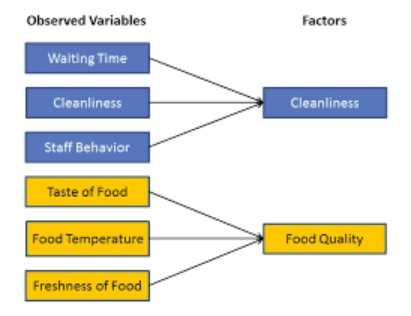

#การทำ Factor Analysis มีประโยชน์หลัก 2 อันคือ

1.Confirmatory

2.Expoloratory

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [4]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=dbc4bcc2dd2901ae26739eba2c6d7d18aceac8e8f4a49f249c0514553c4f2bd4
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [6]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 
#in chapter3 from matplotlib import pyplot as plt

#Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o5 ด้วยคำสั่ง .iloc[]

In [7]:
BFI_data.shape

(2800, 29)

In [8]:
BFI_data_dropped = BFI_data.iloc[:,1:26]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


#เฉลย

In [9]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [10]:
BFI_data_dropped = BFI_data_dropped.dropna()
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [11]:
BFI_data_dropped.shape #run ผลออกมาดูใช้ .shape

(2436, 25)

#Bartlett’s test

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #import function ที่ใช้งาน ชื่อcalculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped) 
chi_square_value, p_value

(18170.966350869243, 0.0)

พบว่า data = 0.0 คือ การทดสอบมีนัยสำคัญทางสถิติบ่งชี้ว่าเมทริกซ์สหสัมพันธ์ที่สังเกตได้ไม่ใช่เมทริกซ์เอกลักษณ์

#Kaiser-Meyer-Olkin (KMO) Test

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model

0.8485397221949221

#FACTOR ANALYSIS

In [14]:
from factor_analyzer import  FactorAnalyzer #import

In [15]:
fa = FactorAnalyzer(n_factors=20)#define

Choosing the Number of Factors

###IMPORT

In [16]:
from factor_analyzer import FactorAnalyzer

###Fit-transform

In [17]:
data_fa = fa.fit_transform(BFI_data_dropped)
data_fa.shape


(2436, 20)

In [18]:
ev, v = fa.get_eigenvalues() #ตรวจดูว่าควรลดเหลือกี่ dimention (มี factor)

###ใช้ eigen values

In [20]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

#Scree plot

TypeError: ignored

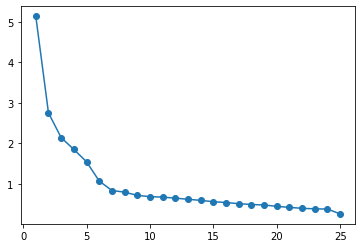

In [21]:
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),BFI_data_dropped.shape[1]+1*[1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.analyze(BFI_data_dropped, 25, rotation=None)
# Checl Ejgenvalues

AttributeError: ignored

#รัน factor annalyzer ด้วย parameter จำนวนเท่ากับ 6

In [22]:
from factor_analyzer import  FactorAnalyzer #import
fa2 = FactorAnalyzer(n_factors=6)#define
data_fa = fa2.fit_transform(BFI_data_dropped)

In [23]:
fa2.loadings_.shape

(25, 6)

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

#plot factor loadings


In [25]:
from matplotlib import pyplot as plt
import numpy as np


#matrix plot

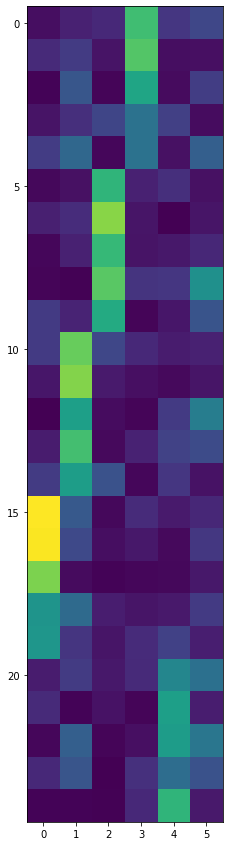

In [26]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

#กราฟแท่ง

In [27]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

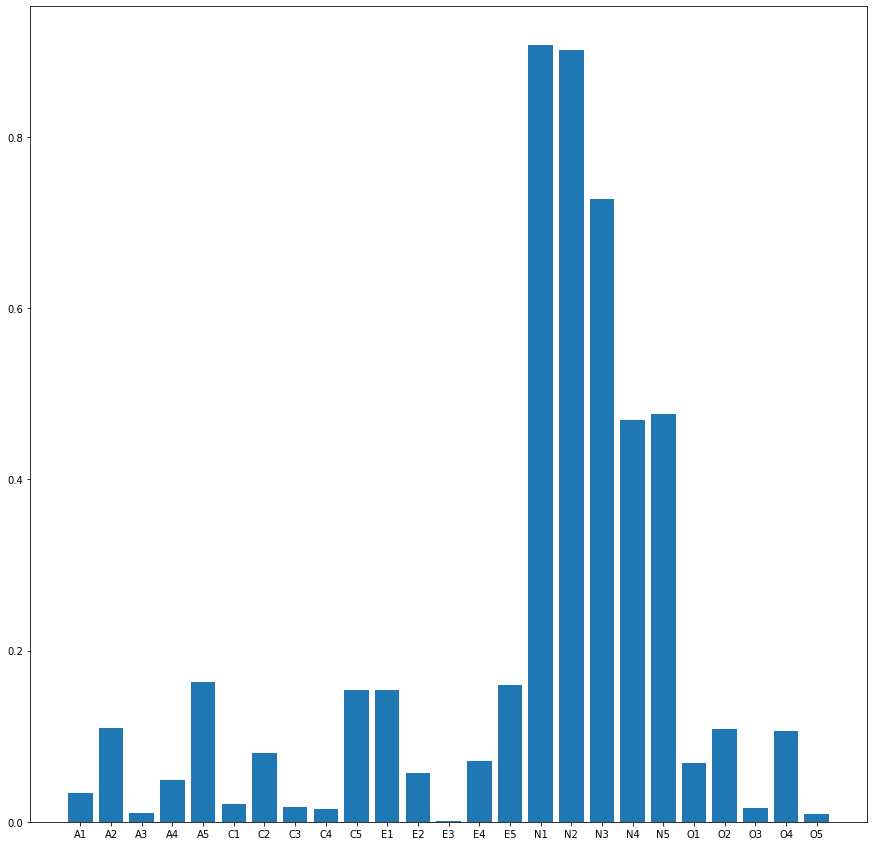

In [28]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

#Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 

```
# This is formatted as code
```



In [29]:
ex1 = pd.read_csv('FIFA 2018 Statistics.csv')
ex1

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


###จากข้อมูลที่ได้มาต้องเลือกข้อมูลที่ต้องการคือ Goal - scored ถึง red

In [30]:
ex1.shape

(128, 27)

In [31]:
ex1_dropped = ex1.iloc[:,3:20] #เลือกคอลัมน์ที่ต้องการหา
ex1_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [32]:
ex1_dropped.shape #เรียกดูขนาดข้อมูล

(128, 17)

#Bartlett’s test
เพื่อดูค่า p-value ที่เข้าใกล้ค่า 0 มากที่สุด

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(ex1_dropped)
chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

จากการใช้ Bartlett’s test ในการตรวจสอบพบว่า ค่า p-value = 2.7135*10^-189 ซึ่งเป็นค่าที่เข้าใกล้ 0 โดยสามารถนำไปทำการทดสอบในขั้นถัดไปได้








#KMO Test


In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ex1_dropped)
kmo_model

0.5594556344508279

จากการทดสอบด้วย KMO มีค่าประมาณ 0.56 หรือประมาณได้ 0.6 แปลว่า ตัวแปรนี้หรือข้อมูลตัวนี้นั้นเหมาะสมที่นำไปทำ Factor Analysis

#Factor Analysis


In [35]:
from factor_analyzer import FactorAnalyzer

In [46]:
ex1_fa = FactorAnalyzer(n_factors=5)

In [47]:
data_ex1_fa = ex1_fa.fit_transform(ex1_dropped)

In [48]:
data_ex1_fa.shape #เรียกดูขนาดข้อมูล

(128, 5)

#ลด Dimeansion จาก eigen values

In [49]:
ev,v = ex1_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

#scree plot

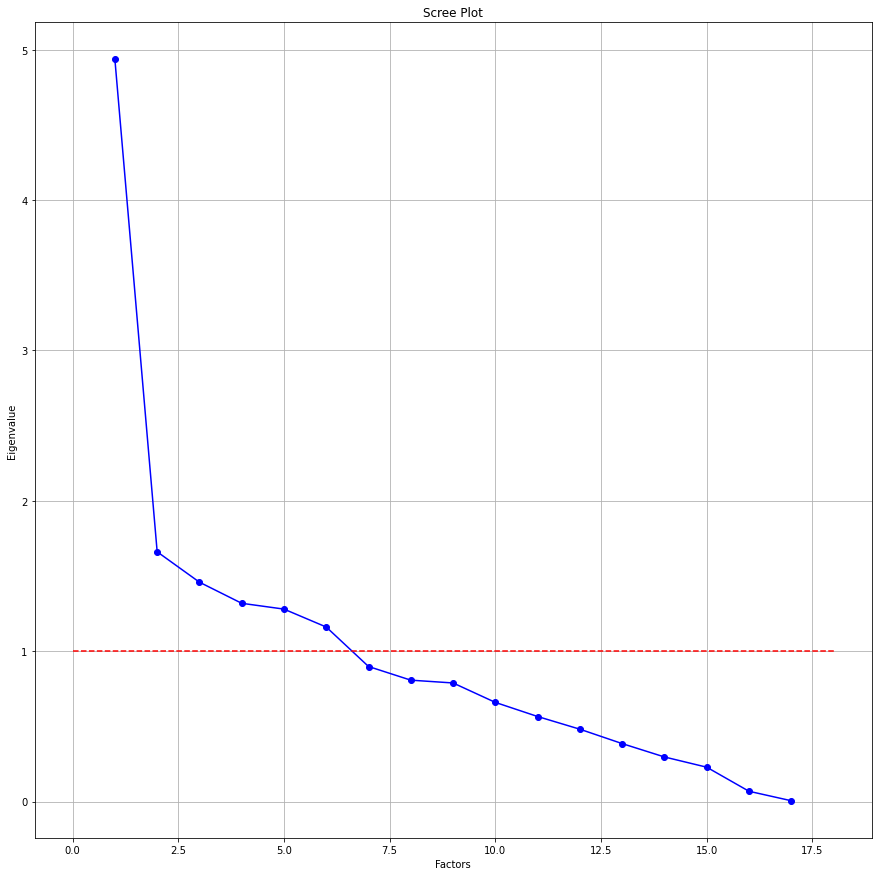

In [50]:
plt.plot(range(1,ex1_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,ex1_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


สรุปจากการได้ว่า ค่าของข้อมูลนั้น ชมีค่า factor มากกว่า 1 อยู่ 6 ตัว

In [51]:
data_ex1_fa[:,:6]

array([[-5.06252545e-01, -7.37614581e-01,  1.85242986e+00,
         1.55563695e+00, -4.95043659e-01],
       [ 4.97055628e-01, -1.67726907e+00, -4.30559514e-01,
        -1.41042452e+00, -5.70672702e-01],
       [-7.58047401e-01, -7.89669935e-01, -9.72328840e-02,
        -4.70101474e-01, -5.44438704e-01],
       [ 4.96573114e-01, -2.63724010e-01, -1.55213677e+00,
        -7.35188276e-03,  2.24483222e-01],
       [ 1.19858232e+00, -8.97005986e-01,  1.73070605e+00,
        -2.79562926e-02, -6.66848308e-02],
       [-1.18538181e+00, -1.67706069e-01,  1.51874714e-01,
        -5.86008034e-01, -7.82387976e-01],
       [-1.04796690e+00, -1.37675722e+00, -1.19199543e-01,
        -2.74435119e-01, -2.57309368e-01],
       [ 1.19455616e+00, -5.44627462e-01, -5.62703571e-01,
         7.16959901e-01, -5.43076695e-01],
       [ 2.12993373e-01, -6.94727156e-01,  6.19907519e-01,
         7.58297408e-01, -3.44629426e-01],
       [-1.86549385e-01, -1.62264722e+00,  1.37981485e+00,
        -8.79609773e-01

#Run Factor Analyzer Agin by paremeters  (factor = 6 )

In [52]:
from factor_analyzer import FactorAnalyzer
ex1_fa1 = FactorAnalyzer(n_factors=6)
data_ex1_fa1 = ex1_fa1.fit_transform(ex1_dropped)

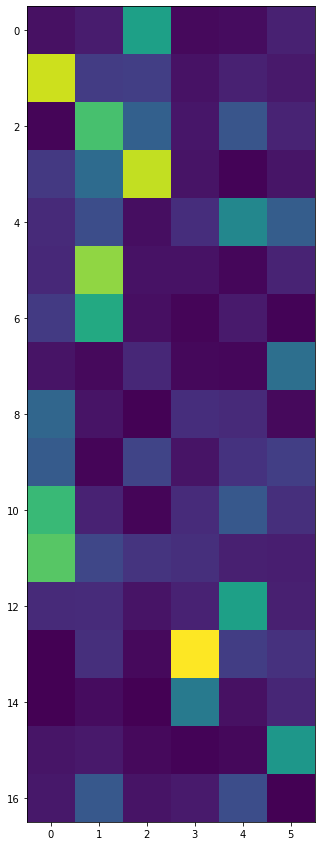

In [57]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(ex1_fa1.loadings_))

In [54]:
ex1_dropped.columns


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

#plot grap

<BarContainer object of 17 artists>

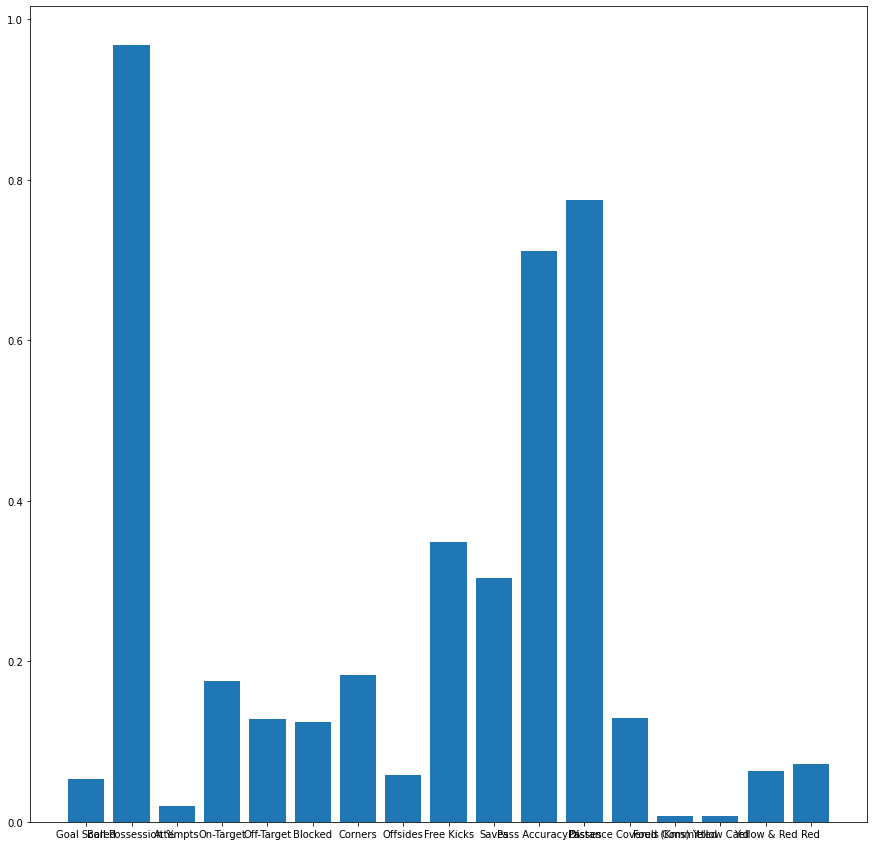

In [55]:
plt.bar(range(17),np.absolute(ex1_fa1.loadings_[:,0]),tick_label=ex1_dropped.columns)

###จากการทดสอบด้วยทุกขั้นตอนพบว่า

ค่าของข้อมูล Fifa 2018 Statistics นี้มีตัวแปรที่เป็น Factors อยู่ด้วยกันทั้งหมด จำนวน 6 ตัว  โดยสามารถอธิบายข้อมูล Fifa 2018 ที่ทำการหา Exporatory Factors Analysis and Confirmatory Factors Analysis